In [1]:
import pickle


file = open('betas.pkl', 'rb')
beta_robust = pickle.load(file)
file.close()

file = open('rmse_robust.pkl', 'rb')
rmse_robust = pickle.load(file)
file.close()

file = open('weights.pkl', 'rb')
weights_robust = pickle.load(file)
file.close()

In [2]:
import numpy as np

lambda_range = np.array([0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0])
alpha_range = np.array([0.15, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0])

rmse_robust_record = np.zeros(len(list(rmse_robust.keys())))

for idx_lambda,lambda_ in enumerate(list(rmse_robust.keys())):
    for idx_m,m in enumerate(list(rmse_robust[lambda_].keys())):
        
        rmse_robust_record[idx_lambda] += rmse_robust[lambda_][m]
    rmse_robust_record[idx_lambda] = rmse_robust_record[idx_lambda]/len(list(rmse_robust[lambda_].keys()))

In [3]:
v_robust = np.min(rmse_robust_record)
idx_robust = np.argmin(rmse_robust_record)

In [4]:
a_map = np.zeros((alpha_range.shape[0],lambda_range.shape[0]))

# for each pair (alpha, lambda)
for idx_alpha, alpha_ in enumerate(alpha_range):

    # for each lambda:
    for idx_lambda, lambda_ in enumerate(lambda_range):
        # print(list(rmse_robust[(alpha_,lambda_)].values()))
        a_map[idx_alpha,idx_lambda] = np.array(list(rmse_robust[(alpha_,lambda_)].values())).mean()

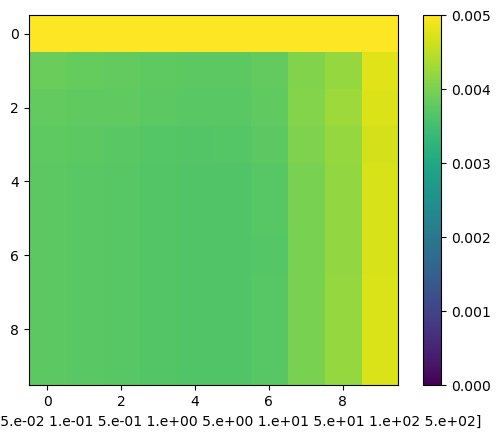

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(a_map,vmin=0.0, vmax=0.005)
plt.colorbar()
plt.xlabel(lambda_range)
# plt.savefig('rmse_map')
plt.savefig("results/rmse_map_.eps", dpi=150)
plt.show()

In [19]:
file = open('betas_ridge.pkl', 'rb')
beta_ridge = pickle.load(file)
file.close()

file = open('rmse.pkl', 'rb')
rmse_ridge = pickle.load(file)
file.close()

In [22]:
import numpy as np
rmse_ridge_record = np.zeros(len(list(rmse_ridge.keys())))

for idx_lambda,lambda_ in enumerate(list(rmse_ridge.keys())):
    for idx_m,m in enumerate(list(rmse_ridge[lambda_].keys())):
        
        rmse_ridge_record[idx_lambda] += rmse_ridge[lambda_][m]
    rmse_ridge_record[idx_lambda] = rmse_ridge_record[idx_lambda]/len(list(rmse_ridge[lambda_].keys()))

In [27]:
v_ridge = np.min(rmse_ridge_record)
idx_ridge = np.argmin(rmse_ridge_record)

In [31]:
lambda_range = np.array([0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0])

0.5

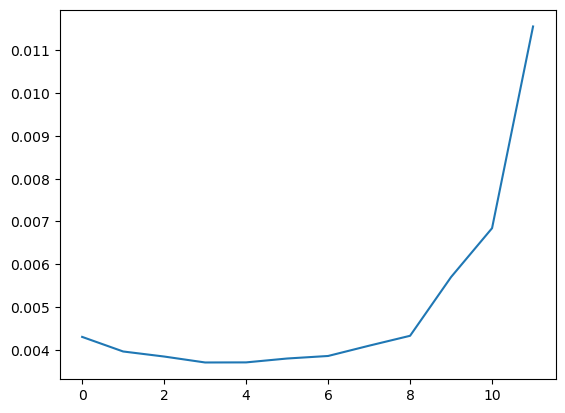

In [32]:
import matplotlib.pyplot as plt

plt.plot(rmse_ridge_record)
plt.show()